In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [2]:
#Load IMBD Dataset and set vocabulary size
vocabulary_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)

In [32]:
from collections import Counter

train_counts = Counter(y_train)
test_counts = Counter(y_test)

print("Train set distribution:")
print(f"Negative: {train_counts[0]} ({train_counts[0]/len(y_train):.2%})")
print(f"Positive: {train_counts[1]} ({train_counts[1]/len(y_train):.2%})")

print("\nTest set distribution:")
print(f"Negative: {test_counts[0]} ({test_counts[0]/len(y_test):.2%})")
print(f"Positive: {test_counts[1]} ({test_counts[1]/len(y_test):.2%})")

Train set distribution:
Negative: 12500 (50.00%)
Positive: 12500 (50.00%)

Test set distribution:
Negative: 12500 (50.00%)
Positive: 12500 (50.00%)


In [3]:
#Inspect sample review and label
sample_review = X_train[0]
sample_review

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
positive_or_negative_label = y_train[0]
positive_or_negative_label

1

In [5]:
word_index = imdb.get_word_index()

In [7]:
# decoded_sentences = []  

# for sentence in X_train:           
#     decoded_sentence = []        
#     for word in sentence:          
#         for key, value in word_index.items():
#             if value == word:
#                 decoded_sentence.append(key)
#     decoded_sentences.append(decoded_sentence)

In [54]:
# shift by 3 to match X_train's encoding
reverse_index = {value + 3: key for key, value in word_index.items()}
reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNK>"
reverse_index[3] = "<UNUSED>"

decoded_sentences = [
    [reverse_index.get(i, "?") for i in sentence] 
    for sentence in X_train
]

In [9]:
decoded_sentences

[['<START>',
  'this',
  'film',
  'was',
  'just',
  'brilliant',
  'casting',
  'location',
  'scenery',
  'story',
  'direction',
  "everyone's",
  'really',
  'suited',
  'the',
  'part',
  'they',
  'played',
  'and',
  'you',
  'could',
  'just',
  'imagine',
  'being',
  'there',
  'robert',
  '<UNK>',
  'is',
  'an',
  'amazing',
  'actor',
  'and',
  'now',
  'the',
  'same',
  'being',
  'director',
  '<UNK>',
  'father',
  'came',
  'from',
  'the',
  'same',
  'scottish',
  'island',
  'as',
  'myself',
  'so',
  'i',
  'loved',
  'the',
  'fact',
  'there',
  'was',
  'a',
  'real',
  'connection',
  'with',
  'this',
  'film',
  'the',
  'witty',
  'remarks',
  'throughout',
  'the',
  'film',
  'were',
  'great',
  'it',
  'was',
  'just',
  'brilliant',
  'so',
  'much',
  'that',
  'i',
  'bought',
  'the',
  'film',
  'as',
  'soon',
  'as',
  'it',
  'was',
  'released',
  'for',
  '<UNK>',
  'and',
  'would',
  'recommend',
  'it',
  'to',
  'everyone',
  'to',
  'w

In [10]:
#Review padding and model creation
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=128, input_length=500))
model.add(SimpleRNN(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.build(input_shape=(None, 500))

model.summary() 

/Users/kulfi/Desktop/Complete-Python-Bootcamp-main/1-Python Basics/ANN PROJECT/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import load_model

In [12]:
#Initialise the optimiser for backprop and loss
opt = Adam(learning_rate = 0.0001)
loss = BinaryCrossentropy()

In [13]:
## Compile Model
model.compile(optimizer = opt, loss = loss, metrics=['accuracy'])

In [14]:
#Set up Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [15]:
#Training the Model
history = model.fit(
    X_train, y_train, validation_data = (X_test, y_test), epochs = 100,
    callbacks = [early_stopping]
)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 119ms/step - accuracy: 0.6098 - loss: 0.6549 - val_accuracy: 0.7661 - val_loss: 0.5066
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.8162 - loss: 0.4195 - val_accuracy: 0.8391 - val_loss: 0.3605
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.8884 - loss: 0.2782 - val_accuracy: 0.8751 - val_loss: 0.3063
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.9139 - loss: 0.2267 - val_accuracy: 0.8710 - val_loss: 0.3231
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.9318 - loss: 0.1884 - val_accuracy: 0.8799 - val_loss: 0.2943
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.9437 - loss: 0.1602 - val_accuracy: 0.8748 - val_loss: 0.3234
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.9514 - loss: 0.1376 - val_accuracy: 0.8714 - val_loss: 0.3432
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.9553 -

In [16]:
model.save("simple_rnn_imdb.h5")

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score
y_prob = model.predict(X_test)
threshold = 0.50
y_pred = (y_prob >= threshold).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step


Accuracy: 0.8799
Precision: 0.8817
Recall: 0.8776
F1-score: 0.8796
AUC: 0.9503


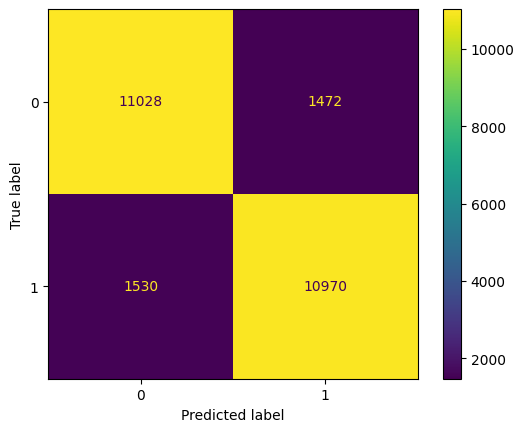

In [47]:
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

In [18]:
# Prediction with Sample Review
word_index = imdb.get_word_index()
reverse_index = {value:key for key, value in word_index.items()}

In [19]:
model = load_model("simple_rnn_imdb.h5")

In [20]:
def decode_review(encoded_review):
    reverse_index = {value + 3: key for key, value in word_index.items()}
    reverse_index[0] = "<PAD>"
    reverse_index[1] = "<START>"
    reverse_index[2] = "<UNK>"
    reverse_index[3] = "<UNUSED>"

    decoded_sentence = [
        [reverse_index.get(i, "?") for i in encoded_review]
    ]

In [21]:
def pre_processtext(text):
    words = text.lower().split()
    encoded_review = [word_index.get(word, 2) + 3 for word in words]
    padded_review = sequence.pad_sequences([encoded_review], maxlen= 500)
    return padded_review

In [22]:
#Prediction function
def predict_sentiment(review):
    pre_processedinput = pre_processtext(review)
    prediction = model.predict(pre_processedinput)
    sentiment = 'Positive' if prediction[0][0] > 0.5 else "Negative"

    return sentiment, prediction[0][0]

In [24]:
example_review = "This was a great movie!"

predict_sentiment(example_review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


('Positive', 0.7060817)

In [26]:
example_review = "I DID NOT LIKE THE MOVIE!"

predict_sentiment(example_review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


('Negative', 0.4990982)